In [1]:
import pandas as pd
import numpy as np

import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
new = pd.read_csv(r"C:\Users\Owner\Desktop\MachineLearning\Real estate.csv")
new.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
0,1,2013,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2013,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2014,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2014,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2013,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1   transaction_date                     414 non-null    int64  
 2   house_age                            414 non-null    float64
 3   distance_to_the_nearest_MRT_station  414 non-null    float64
 4   number_of_convenience_stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house_price                          414 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


In [4]:
q1 = new['transaction_date'].quantile(0.25)
q3 = new['transaction_date'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

2013.0

In [5]:
new['transaction_date']=np.where(new['transaction_date']> upper_limit,upper_limit,new['transaction_date'])

<AxesSubplot:>

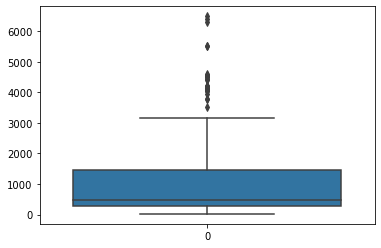

In [6]:
sns.boxplot(data=new['distance_to_the_nearest_MRT_station'])

In [7]:
q1 = new['distance_to_the_nearest_MRT_station'].quantile(0.25)
q3 = new['distance_to_the_nearest_MRT_station'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

3201.7103

In [8]:
new['distance_to_the_nearest_MRT_station']=np.where(new['distance_to_the_nearest_MRT_station']> upper_limit,upper_limit,new['distance_to_the_nearest_MRT_station'])

<AxesSubplot:>

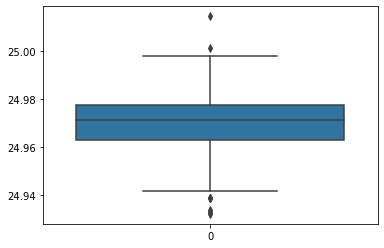

In [9]:
sns.boxplot(data=new['latitude'])

In [10]:
q1 = new['latitude'].quantile(0.25)
q3 = new['latitude'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
print(upper_limit)
lower_limit= q3 - 1.5*iqr
print(lower_limit)


24.999137499999996
24.955772500000002


In [11]:
new['latitude']=np.where(new['latitude']> upper_limit,upper_limit,new['latitude'])
new['latitude']=np.where(new['latitude']< lower_limit,lower_limit,new['latitude'])

<AxesSubplot:>

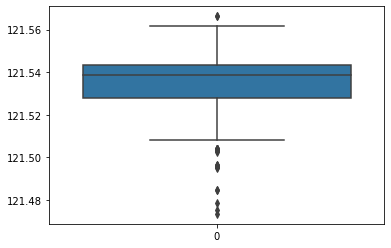

In [12]:
sns.boxplot(data=new['longitude'])

In [13]:
q1 = new['longitude'].quantile(0.25)
q3 = new['longitude'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
print(upper_limit)
lower_limit= q3 - 1.5*iqr
print(lower_limit)

121.566135
121.520475


In [14]:
new['longitude']=np.where(new['longitude']> upper_limit,upper_limit,new['longitude'])
new['longitude']=np.where(new['longitude']< lower_limit,lower_limit,new['longitude'])

<AxesSubplot:>

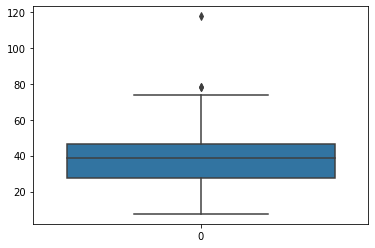

In [15]:
sns.boxplot(data=new['house_price'])

In [16]:
q1 = new['house_price'].quantile(0.25)
q3 = new['house_price'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

74.95

In [17]:
new['house_price']=np.where(new['house_price']> upper_limit,upper_limit,new['house_price'])

<AxesSubplot:>

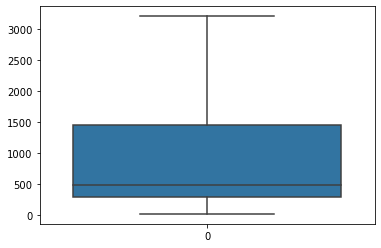

In [18]:
sns.boxplot(data=new['distance_to_the_nearest_MRT_station'])

In [19]:
new.describe()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
count,414.000000,414.0,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.0,17.712560,974.545851,4.094203,24.970246,121.536080,37.861957
std,119.655756,0.0,11.392485,968.915855,2.945562,0.010037,0.010179,13.112035
min,1.000000,2013.0,0.000000,23.382840,0.000000,24.955773,121.520475,7.600000
25%,104.250000,2013.0,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.0,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.0,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.0,43.800000,3201.710300,10.000000,24.999137,121.566135,74.950000


In [20]:
new.isna().sum()

No                                     0
transaction_date                       0
house_age                              0
distance_to_the_nearest_MRT_station    0
number_of_convenience_stores           0
latitude                               0
longitude                              0
house_price                            0
dtype: int64

In [21]:
new.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
0,1,2013.0,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2013.0,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.0,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.0,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2013.0,5.0,390.56840,5,24.97937,121.54245,43.1


In [22]:
X = new.drop('house_price',axis=1)

Y = new[['house_price']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, train_size=0.7 ,random_state=100)


In [23]:
df = pd.concat([Y_train, X_train], axis=1)
df.head()

,house_price,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude
287,32.9,288,2013.0,19.2,461.1016,5,24.955773,121.53990
31,25.0,32,2013.0,29.6,769.4034,7,24.982810,121.53408
209,40.9,210,2013.0,34.8,175.6294,8,24.973470,121.54271
239,29.7,240,2013.0,18.1,837.7233,0,24.963340,121.54767
47,61.5,48,2013.0,35.9,640.7391,3,24.975630,121.53715


In [24]:
df.corr()

,house_price,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude
house_price,1.000000,0.046580,NaN,-0.225664,-0.711419,0.576194,0.518078,0.459521
No,0.046580,1.000000,NaN,-0.026710,-0.110133,0.075824,0.039189,0.073056
transaction_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
house_age,-0.225664,-0.026710,NaN,1.000000,0.006969,0.063199,0.041726,-0.065760
distance_to_the_nearest_MRT_station,-0.711419,-0.110133,NaN,0.006969,1.000000,-0.636064,-0.476306,-0.648493
number_of_convenience_stores,0.576194,0.075824,NaN,0.063199,-0.636064,1.000000,0.382381,0.434109
latitude,0.518078,0.039189,NaN,0.041726,-0.476306,0.382381,1.000000,0.186011
longitude,0.459521,0.073056,NaN,-0.065760,-0.648493,0.434109,0.186011,1.000000


<AxesSubplot:>

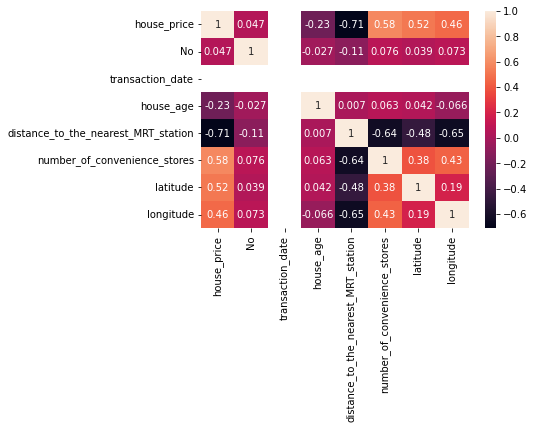

In [25]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:title={'center':'sales vs TV'}, xlabel='distance_to_the_nearest_MRT_station', ylabel='house_price'>

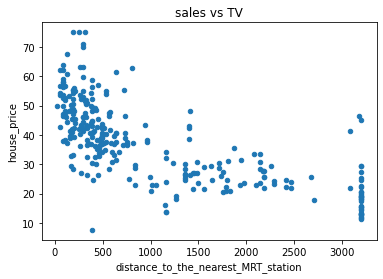

In [26]:
df.plot.scatter(x='distance_to_the_nearest_MRT_station', y='house_price', title='sales vs TV')

In [27]:
X1=df.drop(['house_price'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

No                                     1.013308e+00
transaction_date                       2.793237e+08
house_age                              1.016361e+00
distance_to_the_nearest_MRT_station    2.746971e+00
number_of_convenience_stores           1.722184e+00
latitude                               1.361404e+00
longitude                              1.803236e+00
dtype: float64

In [28]:
X1=df.loc[:,['transaction_date','house_age','distance_to_the_nearest_MRT_station','number_of_convenience_stores','latitude','longitude']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

transaction_date                       2.793142e+08
house_age                              1.015653e+00
distance_to_the_nearest_MRT_station    2.734355e+00
number_of_convenience_stores           1.721949e+00
latitude                               1.361080e+00
longitude                              1.803217e+00
dtype: float64

In [29]:
import statsmodels.formula.api as smf
model = smf.ols('house_price ~ transaction_date + house_age + distance_to_the_nearest_MRT_station + number_of_convenience_stores + latitude',data=df).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     118.8
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           2.10e-59
Time:                        14:27:08   Log-Likelihood:                -1022.0
No. Observations:                 289   AIC:                             2054.
Df Residuals:                     284   BIC:                             2072.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.0018      0.000     -5.375      0.000      -0.003      -0.001
transaction_date                       -3.7009      0.689     -5.375      0.000      -5.056      -2.346
house_age                              -0.2875      0.043     -6.711      0.000      -0.372      -0.203
distance_to_the_nearest_MRT_station    -0.0063      0.001     -9.456      0.000      -0.008      -0.005
number_of_convenience_stores            0.9173      0.212      4.325      0.000       0.500       1.335
latitude                              300.1820     55.509      5.408      0.000     190.921     409.443
==============================================================================
Omnibus:                       60.995   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.220
Skew:                           0.916   Prob(JB):                     9.93e-41
Kurtosis:                       6.455   Cond. No.                     5.93e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.4e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
df.head()

,house_price,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude
287,32.9,288,2013.0,19.2,461.1016,5,24.955773,121.53990
31,25.0,32,2013.0,29.6,769.4034,7,24.982810,121.53408
209,40.9,210,2013.0,34.8,175.6294,8,24.973470,121.54271
239,29.7,240,2013.0,18.1,837.7233,0,24.963340,121.54767
47,61.5,48,2013.0,35.9,640.7391,3,24.975630,121.53715


In [31]:
df['fitted_value']=model.fittedvalues #Predicted Value
df['residual']=model.resid  #Error
df.head()

,house_price,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,fitted_value,residual
287,32.9,288,2013.0,19.2,461.1016,5,24.955773,121.53990,37.444415,-4.544415
31,25.0,32,2013.0,29.6,769.4034,7,24.982810,121.53408,42.452060,-17.452060
209,40.9,210,2013.0,34.8,175.6294,8,24.973470,121.54271,42.832291,-1.932291
239,29.7,240,2013.0,18.1,837.7233,0,24.963340,121.54767,33.059985,-3.359985
47,61.5,48,2013.0,35.9,640.7391,3,24.975630,121.53715,35.631557,25.868443


<AxesSubplot:title={'center':'distance_to_the_nearest_MRT_station vs house_price'}, xlabel='distance_to_the_nearest_MRT_station', ylabel='house_price'>

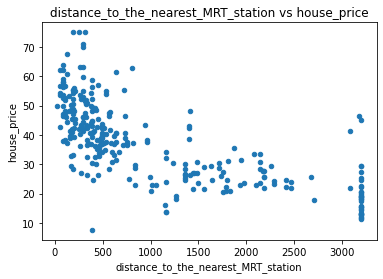

In [32]:
df.plot.scatter(x='distance_to_the_nearest_MRT_station', y='house_price', title='distance_to_the_nearest_MRT_station vs house_price')

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

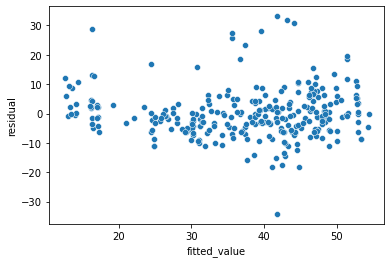

In [33]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

C:\Users\Owner\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


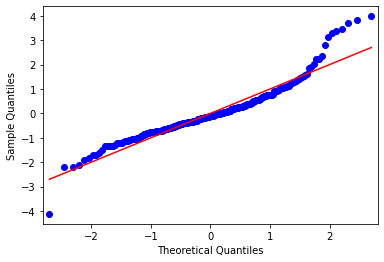

In [34]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

<AxesSubplot:ylabel='Frequency'>

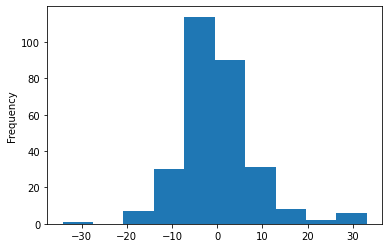

In [35]:
df['residual'].plot.hist()

In [36]:
df_test=pd.concat([X_test,Y_test],axis=1)

df_test.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
121,122,2013.0,13.6,492.23130,5,24.96515,121.537370,48.0
353,354,2013.0,4.1,2147.37600,3,24.96299,121.520475,31.3
96,97,2013.0,6.4,90.45606,9,24.97433,121.543100,59.5
43,44,2013.0,34.4,512.78710,6,24.98748,121.543010,34.1
125,126,2013.0,1.1,193.58450,6,24.96571,121.540890,48.6


In [37]:
df_test['Prediction']=model.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price,Prediction
121,122,2013.0,13.6,492.23130,5,24.96515,121.537370,48.0,41.672129
353,354,2013.0,4.1,2147.37600,3,24.96299,121.520475,31.3,31.434848
96,97,2013.0,6.4,90.45606,9,24.97433,121.543100,59.5,52.712139
43,44,2013.0,34.4,512.78710,6,24.98748,121.543010,34.1,43.182361
125,126,2013.0,1.1,193.58450,6,24.96571,121.540890,48.6,48.243144
